In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


data = pd.read_csv("ifood_df.csv")  


print("Data Exploration:")
print(data.head())  
print(data.info()) 
print(data.describe())  

Data Exploration:
    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  education_2n Cycle  

In [2]:
data.dropna(inplace=True)

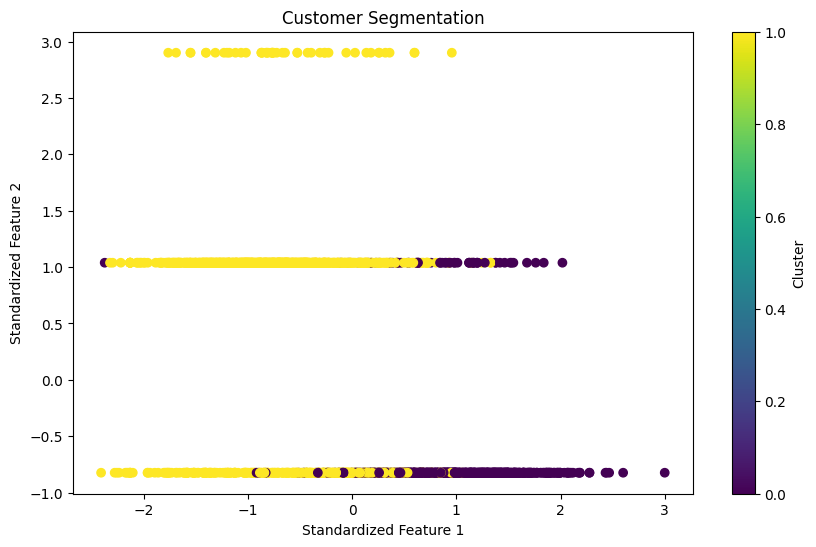

Insights from Customer Segmentation:
               Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Cluster                                                                       
0        71609.414072  0.065744  0.425606  49.491349  624.147636  56.117647   
1        38670.670404  0.686099  0.559043  48.696562  100.117339   7.148729   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0             361.433679        79.940023         57.622837     75.482122   
1              38.228700        10.422272          7.368460     23.694320   

         ...  marital_Together  marital_Widow  education_2n Cycle  \
Cluster  ...                                                        
0        ...          0.253749       0.043829            0.079585   
1        ...          0.260090       0.028401            0.096413   

         education_Basic  education_Graduation  education_Ma

In [3]:
X = data[['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
          'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
          'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
          'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
          'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Age',
          'Customer_Days', 'marital_Divorced', 'marital_Married', 'marital_Single',
          'marital_Together', 'marital_Widow', 'education_2n Cycle', 'education_Basic',
          'education_Graduation', 'education_Master', 'education_PhD', 'MntTotal',
          'MntRegularProds', 'AcceptedCmpOverall']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2


kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
kmeans.fit(X_scaled)
data['Cluster'] = kmeans.labels_


plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Standardized Feature 1')
plt.ylabel('Standardized Feature 2')
plt.colorbar(label='Cluster')
plt.show()


cluster_means = data.groupby('Cluster').mean()


print("Insights from Customer Segmentation:")
print(cluster_means)

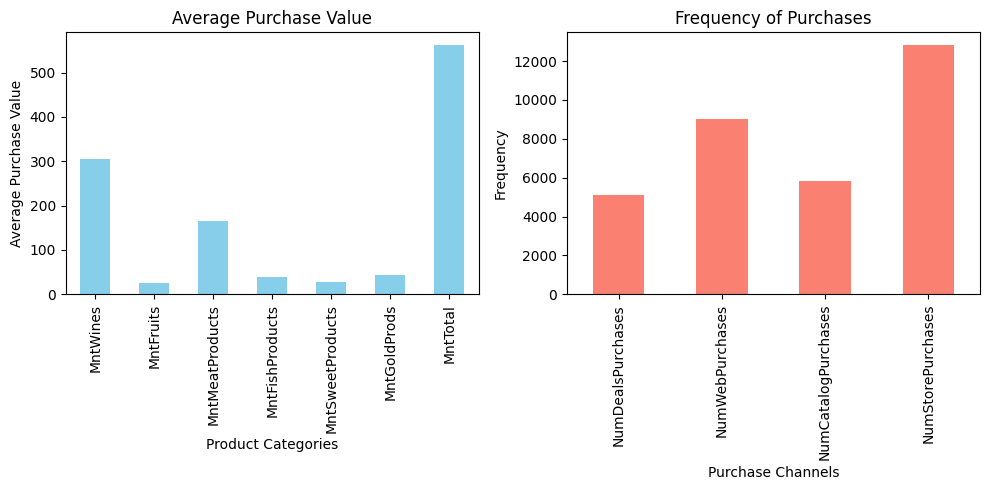

In [4]:
average_purchase_value = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                              'MntSweetProducts', 'MntGoldProds', 'MntTotal']].mean()


frequency_of_purchases = data[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                               'NumStorePurchases']].sum()


plt.figure(figsize=(10, 5))


plt.subplot(1, 2, 1)
average_purchase_value.plot(kind='bar', color='skyblue')
plt.title('Average Purchase Value')
plt.xlabel('Product Categories')
plt.ylabel('Average Purchase Value')


plt.subplot(1, 2, 2)
frequency_of_purchases.plot(kind='bar', color='salmon')
plt.title('Frequency of Purchases')
plt.xlabel('Purchase Channels')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [5]:

# Insights from Customer Segmentation:
# Segment 0: Higher-income customers with higher spending across various product categories.
# Segment 1: Lower-income customers with lower overall spending.


# Recommendations:
# Segment 0:
# - Targeted Marketing: Focus on premium products to capitalize on higher purchasing power.
# - Family-Oriented Offers: Develop deals considering their family composition.
# - Personalized Campaigns: Tailor marketing messages to resonate with their marital status and education.
# - Loyalty Programs: Implement programs to incentivize repeat purchases.

# Segment 1:
# - Value-Oriented Marketing: Offer promotions and discounts to appeal to their budget-conscious nature.
# - Family-Centric Offers: Create offers tailored to larger families.
# - Educational Campaigns: Provide educational materials to assist in making informed purchasing decisions.
# - Feedback Mechanisms: Implement feedback mechanisms to understand their needs better.
